### Exercise 2

In [ ]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

# Set parameters for Neo-Classical Models

beta = 0.95
delta = 0.05
alpha = 0.4
gamma = 2.0
mu1 = 0.0
rho1  = 0.0

In [20]:
'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_w      = scalar, lower bound of cake grid
ub_w      = scalar, upper bound of cake grid 
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points
size_z    = integer, number of grid points in productivity state space
z_grid    = vector, size_z x 1 vector of productivity grid points
------------------------------------------------------------------------
'''
lb_k = 5.0
ub_k = 15.0
size_k = 200  # Number of k grid points
k_grid = np.linspace(lb_k, ub_k, size_k)

# Approximate markov chain for log(z)
size_z = 3
step = 0.04
rho1 = 0.0
mu1 = 0.0
sigma_z = 0.2
#pi_z, z_grid = rouwen(rho1, mu1, step, size_z)
z_grid, pi_z  = addacooper(size_z, mu1, rho1, sigma_z)
pi_z = pi_z.T

'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
C        = matrix, current consumption (c=w-w')
U        = matrix, current period utility value for all possible
           choices of w and w' (rows are w, columns w')
------------------------------------------------------------------------
'''
C = np.zeros((size_k, size_z, size_k)) 
for i in range(size_k): # loop over k
    for j in range(size_z): # loop over z
        for n in range(size_k): # loop over k'
            C[i, j, n] = np.exp(z_grid[j])*(k_grid[i]**alpha) - k_grid[n] + (1-delta)*k_grid[i] # replace 0 and negative consumption with a tiny value 
# This is a way to impose non-negativity on cons
C[C<=0] = 0.01
if gamma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999

In [22]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-3
VFdist = 7.0 
VFmaxiter =3000
VFiter =0
V = np.zeros((size_k, size_z))  # initial guess at value function
#TV = np.zeros((size_k, size_z))-1000  # initial guess at value function
PF = np.zeros((size_k, size_z)) # Policy function index
PF_value = np.zeros((size_k, size_z)) # Policy function value
Vmat = np.zeros((size_k, size_k, size_z))  # initialize Vmat matrix



while VFdist > VFtol and  VFiter < VFmaxiter:  
    for i in range(size_k): # loop over k
        for j in range(size_z): # loop over z
            for n in range(size_k): # loop over k'
                EV = 0.0

                for q in range(size_z): # loop over z' to calculate Expectation
                    EV += pi_z[j,q]*V[n,q] 
                
                c=np.exp(z_grid[j])*(k_grid[i]**alpha) - k_grid[n]+(1-delta)*k_grid[i]  
                if c < 0:
                    c = 10**(-5)
                Vmat[i, n, j] = (c**(1-gamma))/(1-gamma) + beta * EV 
            

            TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
            PF = np.argmax(Vmat, axis=1)
             
          #  TV =np.max(Vmat[i,:,j])
         # PF = np.argmax(Vmat[i,:,j])
            # PF_value[i,j]=k_grid[int(PF[i,j])]
       #     if PF[i,j] == 199:
                #PF[i,j] = 0
    VFdist = (np.absolute(V - TV)).max()  # check distance
 
    VFiter += 1
    V = np.copy(TV)
    print(VFiter,VFdist)


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

1 0.7809255092755149
2 0.5883188243981188
3 0.5507557048341953
4 0.5183735918758008
5 0.48917209180248467
6 0.46242386736323304
7 0.4374005734516633
8 0.41391207799734975
9 0.3917913926142198
10 0.3710373687398212
11 0.3514692996688469
12 0.33285377941503835
13 0.3152973074440997
14 0.2987110194575209
15 0.2830266553103131
16 0.2681318084019839
17 0.25405900246987567
18 0.24075828392125942
19 0.22817233442097518
20 0.21622661585655756
21 0.20494029672299163
22 0.1942547009351836
23 0.1841351104723099
24 0.1745569524997972
25 0.16548583498195946
26 0.15688859992207327
27 0.14875930178726016
28 0.14105968568060057
29 0.13377225775376012
30 0.1268690150223133
31 0.12033297257370634
32 0.11413524419146448
33 0.1082677775691554
34 0.10270774351157819
35 0.0974413878660485
36 0.0924506394502238
37 0.08771917243073446
38 0.08323545459609427
39 0.07898558583434045
40 0.07495694665280617
41 0.07113731166579917
42 0.06751575810928578
43 0.06408067122826466
44 0.06082363710148009
45 0.05773463681

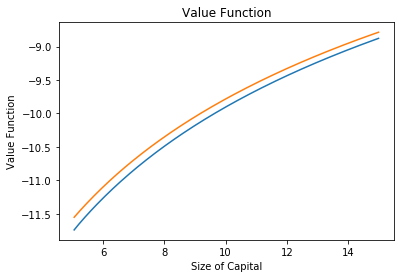

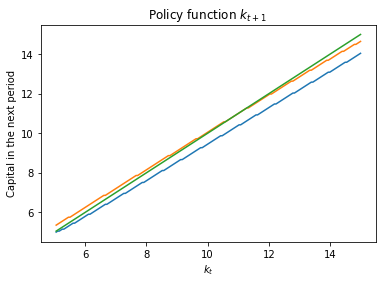

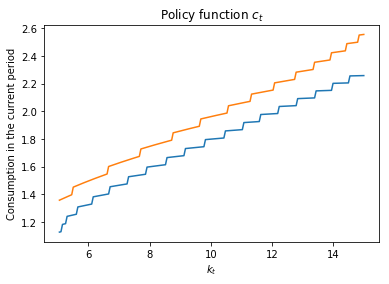

In [31]:
# Plot value function 
plt.figure(1)
# plt.plot(wvec, VF)

plt.plot(k_grid[1:], VF[1:,0])
plt.plot(k_grid[1:], VF[1:,1])
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()


plt.figure(2)

plt.plot(k_grid[1:],  k_grid[PF[1:,0]])

plt.plot(k_grid[1:],  k_grid[PF[1:,1]])

plt.plot(k_grid[1:],  k_grid[1:])


plt.xlabel('$k_t$')
plt.ylabel('Capital in the next period')
plt.title('Policy function $k_{t+1}$ ')
plt.show()


plt.figure(3)



plt.plot(k_grid[1:],  np.exp(z_grid[0])*(k_grid[1:]**alpha) - k_grid[PF[1:,0]]+(1-delta)*k_grid[1:])

plt.plot(k_grid[1:],  np.exp(z_grid[1])*(k_grid[1:]**alpha) - k_grid[PF[1:,1]]+(1-delta)*k_grid[1:])

plt.xlabel('$k_t$')
plt.ylabel('Consumption in the current period')
plt.title('Policy function $c_{t}$ ')
plt.show()

## Exercise 3

In [32]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

# Set parameters for Neo-Classical Models

beta = 0.96
delta = 0.05
alpha = 0.4
gamma = 2.0


'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_w      = scalar, lower bound of cake grid
ub_w      = scalar, upper bound of cake grid 
size_k    = integer, number of grid points in capital state space
k_grid    = vector, size_k x 1 vector of capital grid points
size_z    = integer, number of grid points in productivity state space
z_grid    = vector, size_z x 1 vector of productivity grid points
------------------------------------------------------------------------
'''
lb_k = 5.0
ub_k = 15.0
size_k = 200  # Number of k grid points
k_grid = np.linspace(lb_k, ub_k, size_k)

# Approximate markov chain for log(z)
N = 3
step = 0.04
mu1 = 0.0
rho1  = 0.8
sigma_z = 0.2
#pi_z, z_grid = rouwen(rho1, mu1, step, size_z)
z_grid, pi_z  = addacooper(N, mu1, rho1, sigma_z)


'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of w and w'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of w' for all w 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-5
VFdist = 7.0 
VFmaxiter =3000
VFiter =0
V = np.zeros((size_k, size_z))  # initial guess at value function
#TV = np.zeros((size_k, size_z))-1000  # initial guess at value function
PF = np.zeros((size_k, size_z)) # Policy function index
PF_value = np.zeros((size_k, size_z)) # Policy function value
Vmat = np.zeros((size_k, size_k, size_z))  # initialize Vmat matrix



while VFdist > VFtol and  VFiter < VFmaxiter:  
    for i in range(size_k): # loop over k
        for j in range(size_z): # loop over z
            for n in range(size_k): # loop over k'
                EV = 0.0

                for q in range(size_z): # loop over z' to calculate Expectation
                    EV += pi_z[j,q]*V[n,q] 
                
                c=np.exp(z_grid[j])*(k_grid[i]**alpha) - k_grid[n]+(1-delta)*k_grid[i]  
                if c < 0:
                    c = 10**(-5)
                Vmat[i, n, j] = (c**(1-gamma))/(1-gamma) + beta * EV 
            

            TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
            PF = np.argmax(Vmat, axis=1)
             
          #  TV =np.max(Vmat[i,:,j])
         # PF = np.argmax(Vmat[i,:,j])
            # PF_value[i,j]=k_grid[int(PF[i,j])]
       #     if PF[i,j] == 199:
                #PF[i,j] = 0
    VFdist = (np.absolute(V - TV)).max()  # check distance
 
    VFiter += 1
    V = np.copy(TV)
    print(VFiter,VFdist)


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

1 0.9316522255548313
2 0.8006990339426626
3 0.711646638243707
4 0.6454835096952127
5 0.5933808838540955
6 0.5507224020237662
7 0.5145342726160536
8 0.4830820248410923
9 0.45530300547022584
10 0.43021077890438164
11 0.40731612472067447
12 0.3863215676849876
13 0.36690250700629434
14 0.3488261840497344
15 0.3319033403941791
16 0.3160358537748724
17 0.3011328067183179
18 0.2870921881010027
19 0.273809846892517
20 0.2612439024390998
21 0.2493501022957858
22 0.23808452233476096
23 0.22740442998337862
24 0.21726862738482744
25 0.20764081606433038
26 0.19849375893380916
27 0.1898007769674983
28 0.18153287091678294
29 0.1736629737939417
30 0.16617335460381888
31 0.1590374900897764
32 0.15224371337604836
33 0.14577477975569764
34 0.13961110113196895
35 0.13373398253158086
36 0.12812769064743712
37 0.12277745123659578
38 0.11766901035272781
39 0.11278901750979742
40 0.10812553381490275
41 0.10366743798724443
42 0.09940413871147236
43 0.09532588358967331
44 0.09142341831876166
45 0.08768812718237

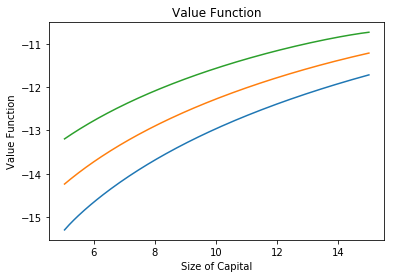

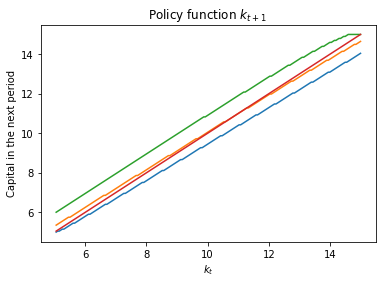

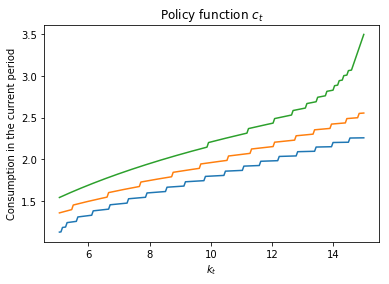

In [33]:
# Plot value function 
plt.figure(1)
# plt.plot(wvec, VF)

plt.plot(k_grid[1:], VF[1:,0])
plt.plot(k_grid[1:], VF[1:,1])
plt.plot(k_grid[1:], VF[1:,2])
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()


plt.figure(2)

plt.plot(k_grid[1:],  k_grid[PF[1:,0]])

plt.plot(k_grid[1:],  k_grid[PF[1:,1]])

plt.plot(k_grid[1:],  k_grid[PF[1:,2]])

plt.plot(k_grid[1:],  k_grid[1:])


plt.xlabel('$k_t$')
plt.ylabel('Capital in the next period')
plt.title('Policy function $k_{t+1}$ ')
plt.show()


plt.figure(3)



plt.plot(k_grid[1:],  np.exp(z_grid[0])*(k_grid[1:]**alpha) - k_grid[PF[1:,0]]+(1-delta)*k_grid[1:], label='$\epsilon$ = ' + str(np.exp(z_grid[0])))

plt.plot(k_grid[1:],  np.exp(z_grid[1])*(k_grid[1:]**alpha) - k_grid[PF[1:,1]]+(1-delta)*k_grid[1:], label='$\epsilon$ = ' + str(np.exp(z_grid[1])))

plt.plot(k_grid[1:],  np.exp(z_grid[2])*(k_grid[1:]**alpha) - k_grid[PF[1:,2]]+(1-delta)*k_grid[1:], label='$\epsilon$ = ' + str(np.exp(z_grid[2])))

plt.xlabel('$k_t$')
plt.ylabel('Consumption in the current period')
plt.title('Policy function $c_{t}$ ')
plt.show()

## Exercise 4

In [34]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

In [35]:
# Declare parameters
# Preference parameters
beta = 0.96
lb_b  = 0.05
ub_b = 1.0
size_b = 20
b_grid =  np.linspace(lb_b, ub_b, size_b)


'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
ub_w      = scalar, upper bound of cake grid 
size_w    = integer, number of grid points in cake state space
w_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------

'''

size_w = 50  # number of grid points in epsilon-space
mu_w = 0.0
rho_w = 0.0
sigma_w = 0.15


'''
Create grid of taste shocks
'''

ln_w_grid, pi_w = addacooper(size_w, mu_w, rho_w, sigma_w)
w_grid = np.exp(ln_w_grid)
pi = np.transpose(pi_w)

In [36]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol       = scalar, tolerance required for value function to converge
VFdist      = scalar, distance between last two value functions
VFmaxiter   = integer, maximum number of iterations for value function
V           = matrix, the value functions at each iteration
TV          = matrix, the value function after applying the Bellman operator
PF_discrete = matrix, matrix of policy function: Take the job=1, not take the job=0 
VFiter      = integer, current iteration number
EV          = scalar, expected value function for a given state
VF          = vector, the "true" value function
b           = Subsidy to unemployed
w           = wage if take job offer
------------------------------------------------------------------------
'''
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 3000 
V0 = np.zeros((size_b, size_w)) # initial guess at value function
V  = np.zeros((size_b, size_w)) # initial guess at value function
TV = np.zeros((size_b, size_w))
PF_discrete = np.zeros((size_b, size_w))
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    for i in range(size_b): # loop over b
        for j in range(size_w): # loop over w
            EV = 0
            for jj in range(size_w):  # loop over w'
                EV += pi[j, jj] * V[i,jj]   #  V[i,ii] = V[b,w'] 
            V0[i,j] = b_grid[i] + beta * EV 
            V1      = w_grid[j]/(1-beta)
            TV[i, j] = max(V1, V0[i,j])
            PF_discrete[i, j] = V1 >= V0[i,j]  #  if = 1 take the job!
            

    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = np.copy(TV)
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation
print('The distance between V and TV is : ',VFdist)

Value function converged after this many iterations: 124
The distance between V and TV is :  8.753065827704631e-09


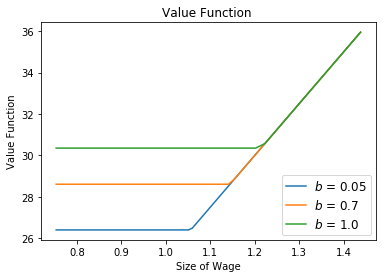

In [37]:
'''
------------------------------------------------------------------------
Find threshold policy functions   
------------------------------------------------------------------------
'''
threshold_w = np.zeros(size_b)
for j in range(size_b):
    threshold_w[j] = w_grid[np.argmax(PF_discrete[j, :])]

# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[1:], VF[0, 1:], label='$b$ = ' + str(b_grid[0]))
ax.plot(w_grid[1:], VF[size_b - 7, 1:], label='$b$ = ' + str(b_grid[size_b-7]))
ax.plot(w_grid[1:], VF[size_b - 1, 1:], label='$b$ = ' + str(b_grid[size_b-1]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Wage')
plt.ylabel('Value Function')
plt.title('Value Function ')
plt.show()

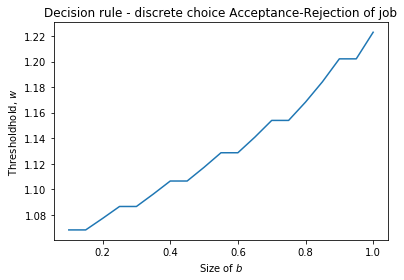

In [38]:
# Plot threshold
plt.figure()
plt.plot(b_grid[1:], threshold_w[1:])
plt.xlabel('Size of $b$')
plt.ylabel('Thresholdhold, $w$')
plt.title('Decision rule - discrete choice Acceptance-Rejection of job')
plt.show()